# Penalized Regression Models


Under ideal conditions, the coefficients produced by ordinary least square regression are unbiased with very less variance. But in real conditions, Linear regression has low bias but suffers from high variance. We can decompose prediction error into squared bias and variance so it may be worth sacrificing some bias to achieve a lower variance. Whenever there is a collinearity between the predictor variables, the variance can become very large. Combatting collinearity by using biased models may result in regression models where the overall prediction error is competitive, meaning accuracy is better.

Penalized models work by penalizing the magnitude of coefficients of features along with minimizing the error between predicted and actual observations. These are called ‘regularization’ techniques. There are two types of regularization techniques called the Ridge and Lasso.

* **Ridge Regression:** Performs L2 regularization, i.e. adds penalty equivalent to square of the magnitude of coefficients 

        Minimization objective = Leat Square parameters + α * (sum of square of coefficients)

* **Lasso Regression:** Performs L1 regularization, i.e. adds penalty equivalent to absolute value of the magnitude of coefficients 

        Minimization objective = Leat Square parameters + α * (sum of absolute value of coefficients)
        
Lets talk about them in more details.


## Ridge Regression

By standard defination, SSE which is the sum of squared errors is defined as:

\begin{align}
\ SSE = \sum\limits_{i=1}^{n} {(y_i-\hat{y_i})^2}
\end{align}

When the model over-fits the data, or when there are issues with collinearity, the linear regression parameter estimates may become inflated as the square will increase the magnitude of the error even more. This will cause MSE to increase which is not wanted, so we may want to control the magnitude of these estimates to reduce the SSE. Ridge regression adds a penalty on the sum of the squared regression parameters:

\begin{align}
\ SSE_{L_2} = \sum\limits_{i=1}^{n} {(y_i-\hat{y_i})^2} +  \underbrace{\lambda\sum\limits_{j=1}^{P} \beta_j^2}_\text{Penalty Term}
\end{align}

<img src="../images/ridge.png", style="width: 700px;">

The “L2” signifies that a second-order penalty which is the square being used on the parameter estimates. In effect, this method shrinks the estimates towards 0 as the λ penalty becomes large (these techniques are sometimes called “shrinkage methods”).The effect of this penalty is that the parameter estimates are only allowed to become large if there is a proportional reduction in SSE. By adding the penalty, we are making a trade-off between the model variance and bias. By sacrificing some bias, we can often reduce the variance enough to make the overall accuracy better than unbiased models. Lets see how penalty effects the SSE:



* β = 0:
    * We’ll get the same coefficients as simple linear regression.
* β = ∞:
    * The coefficients will become zero because of infinite weightage on square of coefficients, anything less than zero will make the objective infinite.
* 0 < β < ∞:
    * The magnitude of β will decide the weightage given to different parts of objective.
        The coefficients will be somewhere between 0 and ones for simple linear regression.
        
Lets utilize an example which uses penalized models to help us understand the differences. We will use Boston Data to see if our penalized models have any effect.

### Exercise

* Implement a Linear Regression on Boston Housing Dataset with 5 fold cross validation. 
* Calculate the accuracy of the model and print it using the variable acc_lr

In [26]:
from sklearn import feature_selection, cross_validation, metrics
from sklearn import datasets, linear_model
from matplotlib import rcParams
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

import numpy as np
import pandas as pd
import seaborn as sns


boston_dataset = datasets.load_boston()
boston_data = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston_data['MEDV'] = boston_dataset.target

X = boston_data[['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = boston_data['MEDV']


use cross_val_score() to find the mean scores

In [32]:
clf = linear_model.ElasticNet(.88)
clf.fit(X, y)
predicted_y = clf.predict(X)
r2_score(y, predicted_y)

0.69134139187750221

In [227]:
import numpy as np

ref_assert_var = False

if( acc_lr >0.37 and acc_lr <0.40):
    ref_assert_var = True
else:
    ref_assert_var = False

assert ref_assert_var, 'Please follow the instructions given and use the same variables provided in the instructions.'

continue


We get a score of 0.38 which is the accuracy. Lets now implement a Ridge regression to see if we get any better accuracy. We will use Ridge() function from sklearn linear_model to build this model.

### Exercise

* Implement Ridge regression and find out the score. Put it in the variable called acc_r

In [228]:
#

use ridge()

In [229]:
clf = linear_model.Ridge()
scores = cross_val_score(clf, X, y, cv=5)
acc_r=scores.mean()
acc_r

0.4104434006712685

In [230]:
import numpy as np

ref_assert_var = False

if( acc_r >0.40 and acc_r <0.43):
    ref_assert_var = True
else:
    ref_assert_var = False
    
assert ref_assert_var, 'Please follow the instructions given and use the same variables provided in the instructions.'

continue


We can clearly see that there has been an improvement in the scores. Hence, the ridge regression helps in increasing the accuracy by penalizing the model by introducing bias.
This comes to our next question, How do we select the value of alpha parameter in the function?

Lets see what effect does the value of penalty term have on the coffecients of the Ridge regression. Let take in different values of alpha and plot the ridge coefficient graph.

```python
n_alphas = 1000
alphas = np.logspace(-5, 6, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
```
We have defined value of alpha from 10 to the power -5 to 10 to the power 6 using which we capture the values of all the coefficients in the regression. Now we plot and see the results.

<img src="../images/ridge_coeff.png", style="width: 700px;"> 

When alpha is very large, the regularization effect dominates the squared loss function and the coefficients tend to zero. At the end of the path, as alpha tends toward zero and the solution tends towards the ordinary least squares, coefficients exhibit big oscillations. In practise it is necessary to tune alpha in such a way that a balance is maintained between both. 

Lets find the different value of accuracy when we vary alpha and plot it. 


### Exercise 

* Find different value of accuracy using for loop on the ridge function used earlier in the exercise and plot the graph
* Use variable "a" to store the values of accuracy from the loop. Convert this variable into a dataframe called "accuracy". Use "accuracy" to plot the graph.
* Find the value of Alpha for which the accuracy is the highest and store it in variable acc_max

In [231]:
#


Use idxmax() to find the index at which the values is highest

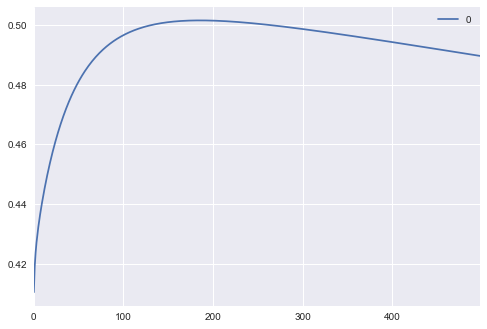

In [232]:
a=[]
for alpha in range(1,500):
    clf = linear_model.Ridge(alpha)
    scores =cross_val_score(clf, X, y, cv = 5)
    a.append(scores.mean())
accuracy=pd.DataFrame(a)
accuracy.plot()
plt.show()
acc_max=accuracy.idxmax()

In [233]:
import numpy as np


ref_assert_var = False
if( sum(acc_max)==185):
    ref_assert_var = True
else:
    ref_assert_var = False
    
assert ref_assert_var, 'Please follow the instructions given and use the same variables provided in the instructions.'

continue


We can see from above graph that accuracy increases till some value and then starts decreasing as the value of λ increases.

## Lasso Regression

Lasso regression also known as Least Absolute Shrinkage and Selection Operator is another penalized model which is used for variable selection and regularization in order to enhance the prediction accuracy. This model uses a similar penalty to ridge regression:

\begin{align}
\ SSE_{L_1} = \sum\limits_{i=1}^{n} {(y_i-\hat{y_i})^2} +  \underbrace{\lambda\sum\limits_{j=1}^{P} \lvert  \beta_j\rvert}_\text{Penalty Term}
\end{align}

<img src="../images/lasso.png", style="width: 700px;">

While this may seem like a small modification, the practical implications are significant. While the regression coefficients are still shrunk towards 0, a consequence of penalizing the absolute values is that some parameters are actually set to 0 for some value of λ. Thus the lasso yields models that simultaneously use regularization to improve the model and to conduct feature selection. While ridge regression shrinks the parameter estimates towards 0, the model does not set the values to absolute 0 for any value of the penalty.

In comparing these two types of penalty, Ridge regression is known to shrink the coefficients of correlated predictors
towards each other, allowing them to borrow strength from each other, lasso, on the other hand, is somewhat indifferent to very correlated predictors, and will tend to pick one and ignore the rest. 

### Exercise

* Implement a LASSO Regression on Boston Housing Dataset with 5 fold cross validation. 
* Calculate the accuracy of the model and print it using the variable acc_lasso


In [234]:
#

use Lasso()

In [235]:
clf = linear_model.Lasso()
scores = cross_val_score(clf, X, y, cv=5)
acc_lasso=scores.mean()
acc_lasso

0.43933576888567494

In [236]:
import numpy as np

ref_assert_var = False
if( acc_lasso >0.43 and acc_lasso <0.45):
    ref_assert_var = True
else:
    ref_assert_var = False
    
assert ref_assert_var, 'Please follow the instructions given and use the same variables provided in the instructions.'

continue


We can see that the accuracy which we have got is still better than that from simple OLS method. Similar to Ridge regression, we can see the Regression Coefficients Progression for Lasso Paths for various value of Alpha,

<img src="../images/lasso_coeff.png", style="width: 700px;"> 


## Elastic Nets

The elastic net is a regularized regression method that linearly combines the L1 and L2 penalties of the lasso and ridge methods.This model combines the two types of penalties as:


\begin{align}
\ SSE_{E_{net}} = \sum\limits_{i=1}^{n} {(y_i-\hat{y_i})^2} +  \underbrace{\lambda_1\sum\limits_{j=1}^{P} \beta_j^2 + \lambda_2\sum\limits_{j=1}^{P} \lvert  \beta_j\rvert}_\text{Penalty Term}
\end{align}

The advantage of this model is that it enables effective regularization via the ridge-type penalty with the feature selection quality of the lasso. Hence Elastic Net enables us to take in advantages from both LASSO and RIdge regularization, combine it and use it in its algorithm.

### Exercise

* Implement a Elastic Net regularization on Boston Housing Dataset with 5 fold cross validation using function ElasticNet(). 
* Calculate the accuracy of the model and print it using the variable acc_enet
* Print and compare the three variables acc_lr, acc_r, acc_lasso and acc_enet

In [237]:
#

use ElasticNet()

In [240]:
clf = linear_model.ElasticNet()
scores = cross_val_score(clf, X, y, cv=5)
acc_enet=scores.mean()
print("Linear Regression Accuracy : ",acc_lr,"\n Ridge Regression Accuracy : ",acc_r,"\n Lasso Regression Accuracy : ",acc_lasso,"\n Elastic Net accuracy : ",acc_enet)

Linear Regression Accuracy :  0.38109621714 
 Ridge Regression Accuracy :  0.410443400671 
 Lasso Regression Accuracy :  0.439335768886 
 Elastic Net accuracy :  0.48086954598


In [239]:
import numpy as np


ref_assert_var = False
if( acc_enet >0.45 and acc_enet <0.5):
    ref_assert_var = True
else:
    ref_assert_var = False
    
assert ref_assert_var, 'Please follow the instructions given and use the same variables provided in the instructions.'

continue
